# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Alvina Aulia Nisa
- **Email:** alvinaaulians@gmail.com
- **ID Dicoding:** alvinaaulianisa

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apakah yang paling digemari pelanggan?
- Jenis barang yang paling banyak dibeli dan bagaimana preferensi pelanggan terhadap harga yang ditawarkan?
- Di daerah manakah yang menjadi konsumsi/melakukan transaksi terbanyak dan seberapa besar peluang bisnis di daerah tersebut?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [136]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [137]:
items_df = pd.read_csv("./data/order_items_dataset.csv")
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [138]:
payments_df = pd.read_csv("./data/order_payments_dataset.csv")
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [139]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [140]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Dari aksi di atas, terdapat 5 dataset dimasukkan ke dalam proyek dengan menggunakan fungsi read_csv() yang nilainya akan tersimpan pada variabel DataFrame yang sudah dibuat.
- Dataset di atas memiliki relasi masing-masing yang akan digunakan untuk mencari nilai dan menjawab pertanyaan bisnis yang telah dibuat.

### Assessing Data

##### DataFrame Customers

In [141]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [142]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [143]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [144]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Berdasarkan assesing yang dilakukan, data frame customers tidak memiliki masalah yang dapat mempengaruhi hasil yang akan dicari. 
- Tipe data pada struktur dari data frame sudah sesuai.
- Tidak terdapat duplikasi ataupun missing value pada data frame customer yang dapat mempengaruhi hasil yang akan dicari.

#### DataFrame Items

In [145]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [146]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [147]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())
items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [148]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Terdapat kesalahan pada tipe data yang dimiliki oleh "shipping_limit_date" yang mana seharusnya memiliki tipe data datetime karena itu menampung nilai berupa waktu dan tanggal.
- Tidak terdapat missing value maupun duplikasi pada data frame items.

#### DataFrame Payments

In [149]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [150]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [151]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [152]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Tidak terdapat masalah pada struktur data di data frame payments.
- Tidak terdapat missing value maupun duplikasi pada data frame payments.

#### DataFrame Orders

In [153]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [154]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [155]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [156]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Terdapat 5 column yang memiliki tipe data tidak sesuai diantaranya adalah order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang bertipe object yang mana seharusnya memiliki tipe data datetime dikarenakan column tersebut menyimpan data berupa waktu dan tanggal.
- Terdapat 3 column yang memiliki missing value yaitu order_approved_at (160 missing value), order_delivered_carrier_date (1783 missing value), dan order_delivered_customer_date (2965 missing value).
- Tidak terdapat duplikasi pada data frame orders

#### DataFrame Products

In [157]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [158]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [159]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [160]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Tidak terdapat masalah pada struktur data di data frame products.
- Terdapat 4 column yang memiliki missing value diantaranya adalah product_category_name (610 missing value), product_name_lenght (610 missing value), product_description_lenght (610 missing value), dan product_photos_qty (610 missing value).
- Tidak terdapat duplikasi pada data frame products.

### Cleaning Data

#### DataFrame Customers

In [161]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Note:** Tidak ada kesalahan untuk dibersihkan.

#### DataFrame Items

In [ ]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  items_df[column] = pd.to_datetime(items_df[column])

In [163]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Tipe data pada column shipping_limit_date sudah diganti yang mulanya adalah object, diganti menjadi datetime dengan fungsi pandas yaitu to_datetime()

#### DataFrame Payments

In [164]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Note:** Tidak ada kesalahan untuk dibersihkan.

#### DataFrame Orders

In [165]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [166]:
import datetime

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [167]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [168]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [169]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].interpolate(method='linear')
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].interpolate(method='linear')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].interpolate(method='linear')

In [170]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- 5 column yang memiliki tipe data yang salah telah diperbaiki dengan menggantinya dengan tipe data yang sesuai, yaitu datetime dengan fungsi pandas to_datetime().
- 3 column dengan missing value telah diatasi dengan metode interpolate. Metode ini dipilih karena sangat cocok diterapkan pada tipe data yang memiliki value data time series dengan menghitung titik data baru berdasarkan range data yang sudah ada.

#### DataFrame Products

In [171]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [172]:
nan_column = [
    "product_name_lenght", "product_description_lenght", "product_photos_qty",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
]

products_df[nan_column] = products_df[nan_column].apply(lambda col: col.fillna(col.mean()))

In [173]:
products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])

In [174]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- 3 column dengan missing value sudah diatasi dengan mean imputation atau mengisi dengan nilai rata-rata, karena column tersebut menampung nilai yang bertipe numerik.
- Missing value pada column product_category_name sudah diatasi dengan mode imputation atau dengan mengisi missing value dengan data terbanyak dari data lainnya.

## Exploratory Data Analysis (EDA)

### Explore DataFrame Customers & Orders

In [175]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [176]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Insight:**
- Dari data di atas terdapat beberapa data yang memiliki value NaN, itu dikarenakan beberapa data di atas bertipe data non-numerik sehingga tidak dapat dicari frekuensi, mean, standar deviasi, min, max. Dan pada data yang memiliki nilai time series juga memiliki value NaN di unique, top, dan freq dikarenan time series bukanlah data yang dapat dicari nilai unique, nilai top, dan juga persebarannya atau frekuensi.

In [177]:
customer_orders_data = pd.merge(orders_df, customers_df, on="customer_id")

city_transactions = (
    customer_orders_data.groupby("customer_city")
    .size()
    .reset_index(name="transaction_count")
    .sort_values(by="transaction_count", ascending=False)
)

city_transactions.head(10)

,customer_city,transaction_count
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


In [178]:
state_transactions = (
    customer_orders_data.groupby("customer_state")
    .size()
    .reset_index(name="transaction_count")
    .sort_values(by="transaction_count", ascending=False)
)

state_transactions.head(10)

,customer_state,transaction_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


**Insight:**
- Dari aksi di atas, dapat diketahui bahwa sao paulo adalah kota dengan tingkat transaksi tertinggi dari data yang diberikan.
- Dari aksi di atas, dapat diketahui juga bahwa SP atau Sao Paulo adalah negara dengan tingkat transaksi tertinggi dari data yang diberikan.
- Hasil di atas diperoleh dari penggabungan data frame orders dan juga customers untuk mencari seberapa banyak customer yang melakukan transaksi dan berasal dari kota yang sama.

### Explore DataFrame Items & Products

In [179]:
items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [180]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
- Dari deskripsi di atas terdapat banyak data yang memiliki value NaN dibeberapa kategori, dan itu disebabkan oleh tipe data dari data tersebut yang merupakan non-numerik.

In [181]:
data_merged = pd.merge(
    left=items_df,
    right=products_df[['product_id', 'product_category_name']],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

data_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


In [182]:
category_counts = data_merged['product_category_name'].value_counts().reset_index()
category_counts.columns = ['product_category_name', 'purchase_count']

category_counts.head(10)

,product_category_name,purchase_count
0,cama_mesa_banho,12718
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


**Insight:**
- Data frame data_merged merupakan data frame baru yang merupakan hasil penggabungan dari data frame items_df dan juga products_df dengan menggunakan metode left join.
- Operasi category_counts adalah operasi untuk menghitung jumlah transaksi dengan nama produk yang sama yang kemudian digabung menjadi kumpulan data yang disimpan ditempat yang sama, yang mana di dalam columns tersebut terdapat 2 column yaitu product_category_name dan purchase_count.

### Explore DataFrame Payments

In [183]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Berdasarkan deskripsi data di atas, beberapa column memiliki value NaN dan itu dikarekan oleh tipe data mereka yang tidak bisa dicarikan unique, top, dan juga frekuensi.

In [184]:
payment_method = payments_df['payment_type'].value_counts()
print(payment_method)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


**Insight:**
- Operasi di atas adalah operasi untuk menghitung berapa banyak transaksi yang menggunakan metode pembayaran tertentu. Nilai yang dihitung menggunakan value_counts() akan disimpan pada data frame payment_method dan menghasilkan metode pembayaran beserta dengan jumlah penggunaannya ketika di print().

## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apakah yang paling digemari pelanggan?

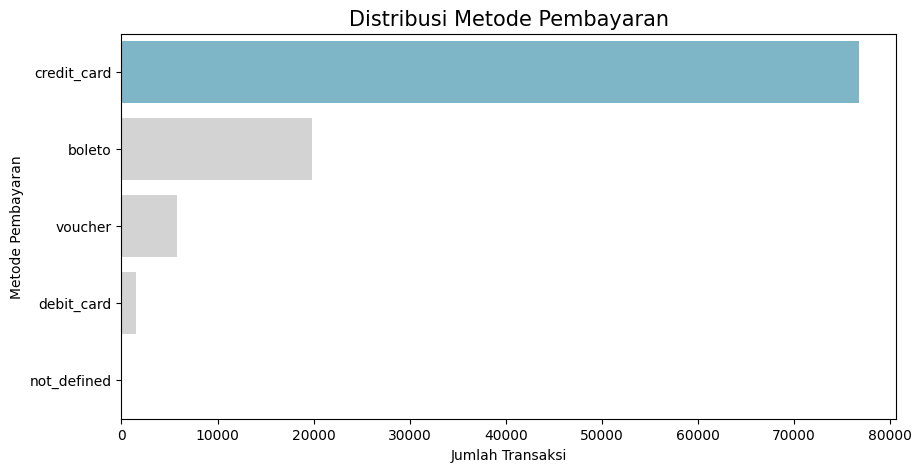

In [66]:
payment_method = payments_df['payment_type'].value_counts().reset_index()
payment_method.columns = ["payment_type", "count"]

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="count", 
    y="payment_type",
    hue="payment_type",
    data=payment_method,
    palette=colors
)

plt.title("Distribusi Metode Pembayaran", fontsize=15)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()

**Insight:**
- Dari hasil visualisasi di atas, dapat diketahui bahwa credit_card adalah metode pembayaran yang paling sering digunakan di dalam transaksi di e-commerce ini karena telah sebanyak hampir menyentuh 80000 kali pemakaian. Dan insight ini pun telah menjawab pertanyaan 1, yaitu credit_card adalah metode pembayaran yang paling digemari oleh pelanggan.
- Visualisasi di atas menggunakan diagram batang dari library seaborn.

### Pertanyaan 2: Jenis barang yang paling banyak dibeli dan bagaimana preferensi pelanggan terhadap harga yang ditawarkan?
##### Pertanyaan tentang preferensi pelanggan akan dijawab di analisis lanjutan.

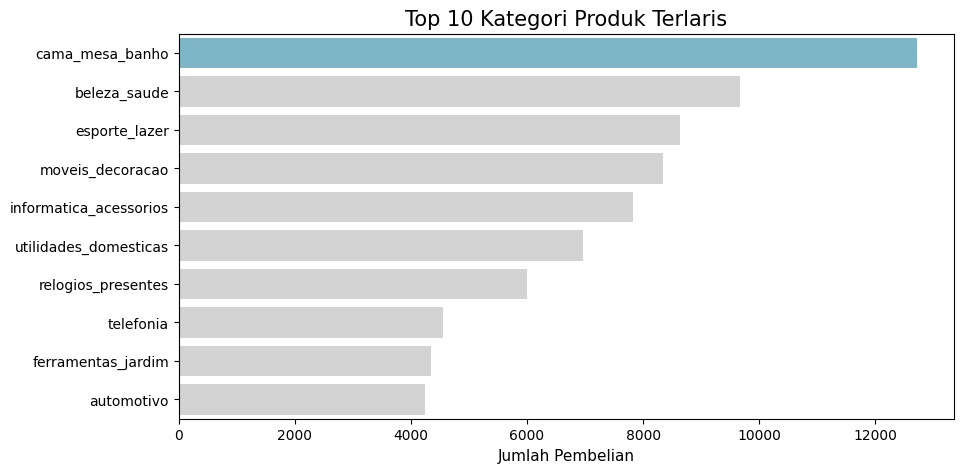

In [69]:
top_categories = category_counts.head(10)

colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9

plt.figure(figsize=(10, 5))
sns.barplot(
    x="purchase_count",
    y="product_category_name",
    hue="product_category_name",
    data=top_categories.sort_values(by="purchase_count", ascending=False),
    palette=colors_
)

plt.title("Top 10 Kategori Produk Terlaris", fontsize=15)
plt.xlabel("Jumlah Pembelian", fontsize=11)
plt.ylabel(None)
plt.legend([], [], frameon=False) 
plt.show()

**Insight:**
- Dari hasil visualisasi di atas, dapat diketahui bahwa cama_mesa_banho adalah produk yang paling banyak dibeli oleh pelanggan. Dan insight ini sudah menjawab pertanyaan 2, yaitu cama_mesa_banho sebagai jenis produk yang paling sering atau banyak dibeli pelanggan karena jumlah pembeliannya yang terjadi lebih dari 12000.
- Visualisasi di atas menggunakan diagram batang dari library seaborn.

### Pertanyaan 3: Di daerah manakah yang menjadi konsumsi/melakukan transaksi terbanyak dan seberapa besar peluang bisnis di daerah tersebut?
##### Pertanyaan tentang seberapa besar peluang bisnis di masing-masing daerah akan dijawab di analisis lanjutan.

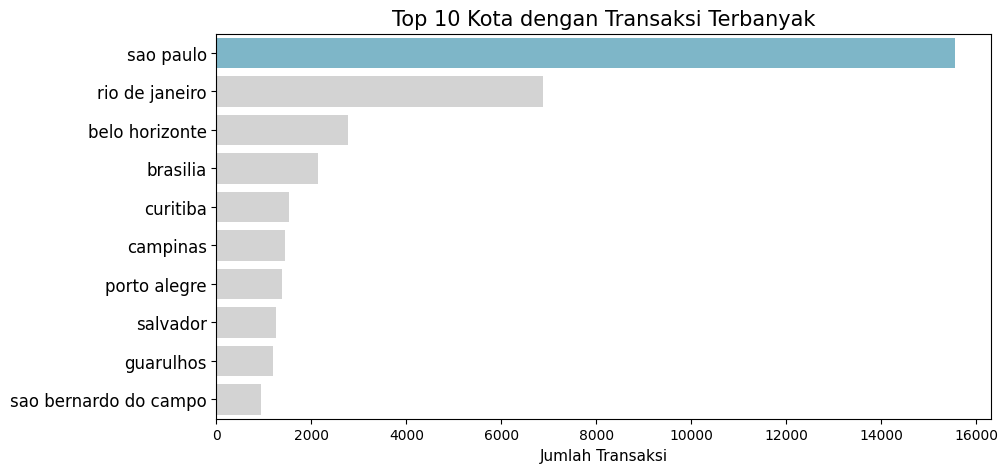

In [123]:
top_city_transactions = city_transactions.sort_values(by="transaction_count", ascending=False).head(10)

colors = ["#72BCD4"] + ["#D3D3D3"] * 9

plt.figure(figsize=(10, 5))
sns.barplot(
    x="transaction_count", 
    y="customer_city",
    hue="customer_city",
    data=top_city_transactions,
    palette=colors,
    dodge=False 
)

plt.title("Top 10 Kota dengan Transaksi Terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Jumlah Transaksi", fontsize=11)
plt.tick_params(axis='y', labelsize=12) 
plt.show()

**Insight:**
- Dari visualisasi di atas dapat diketahui bahwa sao paulo adalah kota dengan transaksi terbanyak diantara kota lainnya dengan jumlah transaksi yang hampir menyentuh 16000, diikuti rio de janeiro di nomor dua dengan jumlah transaksi hampir menyentuh 8000 dan belo horizonte di nomor tiga dengan jumlah transaksi yang berada di range 2000 - 4000.
- Visualisasi di atas menggunakan diagram batang dari library seaborn.

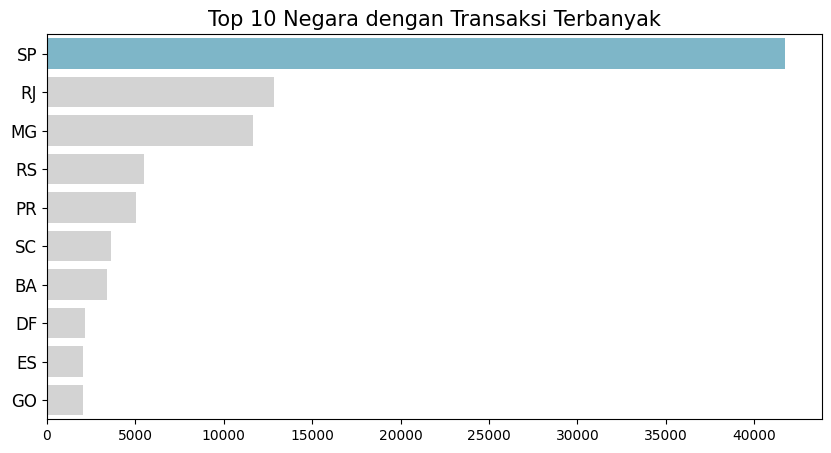

In [124]:
top_state_transactions = state_transactions.sort_values(by="transaction_count", ascending=False).head(10)

colors = ["#72BCD4"] + ["#D3D3D3"] * 9

plt.figure(figsize=(10, 5))
sns.barplot(
    x="transaction_count", 
    y="customer_state",
    hue="customer_state",
    data=top_state_transactions,
    palette=colors,
    dodge=False  
)

plt.title("Top 10 Negara dengan Transaksi Terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Dari visualisasi di atas dapat diketahui bahwa SP atau Sao Paulo adalah negara dengan transaksi terbanyak yang sudah dilakukan yang mana transaksinya terjadi lebih dari 40000 transaksi, di susul dengan RJ yang hampir menyentuh 15000 transaksi dan MG yang juga berada di range 10000-15000 yang sama dengan RJ.
- Visualisasi di atas menggunakan diagram batang dari library seaborn.

## Analisis Lanjutan (Opsional)

### Pertanyaan 1: Metode pembayaran dengan pemakaian paling tinggi

In [185]:
bypayment_df = payments_df.groupby("payment_type")["order_id"].nunique().reset_index()
bypayment_df.rename(columns={"order_id": "payment_count"}, inplace=True)

In [186]:
bypayment_df = bypayment_df.sort_values(by="payment_count", ascending=False)

bins = [0, 10000, 50000, bypayment_df["payment_count"].max()]
labels = ["Low Usage", "Medium Usage", "High Usage"]

bypayment_df["usage_category"] = pd.cut(bypayment_df["payment_count"], bins=bins, labels=labels, include_lowest=True)

print(bypayment_df)

  payment_type  payment_count usage_category
1  credit_card          76505     High Usage
0       boleto          19784   Medium Usage
4      voucher           3866      Low Usage
2   debit_card           1528      Low Usage
3  not_defined              3      Low Usage


**Insight:**
- Operasi di atas adalah operasi manual clustering dengan binning, yang mana data-data yang sudah disatukan dibagi ke dalam beberapa label sesuai dengan kondisi yang sudah ditentukan pada bins. Dan dari hasil menampilkan bahwa credit_card adalah metode pembayaran yang high usage, atau memiliki tingkat pemakaian yang tinggi dengan total transaksi yang dilakukan adalah 76505.

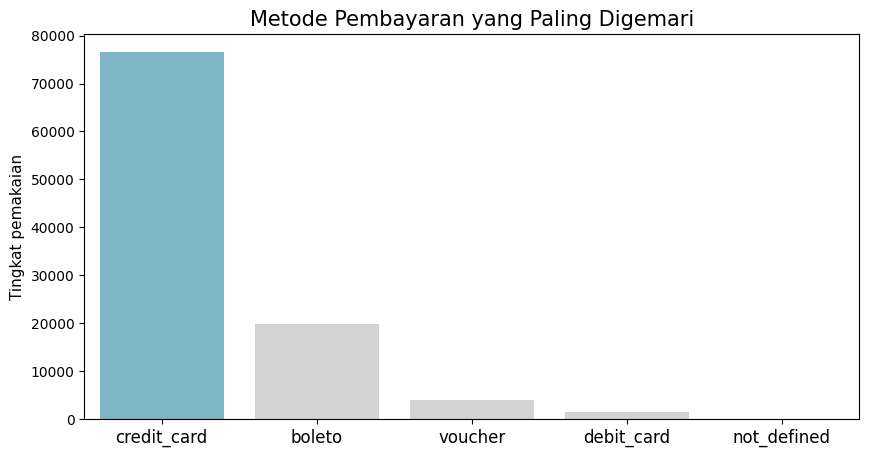

In [187]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="payment_count",
    x="payment_type",
    hue="payment_type",
    data=bypayment_df.sort_values(by="payment_count", ascending=False),
    palette=colors, legend=False
)

plt.title("Metode Pembayaran yang Paling Digemari", loc="center", fontsize=15)
plt.ylabel("Tingkat pemakaian", fontsize=11)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi di atas, credit_card adalah metode pembayaran yang tingkat pemakaiannya paling tinggi diantara metode pembayaran lainnya yaitu sebanyak 76505.
- Visualisasi di atas menggunakan diagram batang dari library seaborn.

### Pertanyaan 2: Preferensi pelanggan terhadap harga yang ditawarkan.

In [188]:
min_price = items_df["price"].min()
max_price = items_df["price"].max()

print("Harga termurah: ", min_price)
print("Harga termahal: ", max_price)

Harga termurah:  0.85
Harga termahal:  6735.0


**Insight:**
- Code di atas adalah code untuk mengetahui berapa nilai minimal dan nilai maksimum pada column price. Code di atas saya gunakan sebagai acuan untuk mengetahui berapa rentang nilai untuk menghitung pereferensi pelanggan terhadap harga yang ditawarkan di e-commerce ini.

In [189]:
product_price = data_merged.groupby("product_id")["price"].mean().reset_index()

Q1 = product_price["price"].quantile(0.25)  
Q3 = product_price["price"].quantile(0.75) 

bins = [0, Q1, Q3, product_price["price"].max()]
labels = ["Murah", "Sedang", "Mahal"]

product_price["price_category"] = pd.cut(product_price["price"], bins=bins, labels=labels, include_lowest=True)
product_price = product_price.sort_values(by="price", ascending=False)

product_price.head(10)

,product_id,price,price_category
9434,489ae2aa008f021502940f251d4cce7f,6735.00,Mahal
13693,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00,Mahal
3698,1bdf5e6731585cf01aa8169c7028d6ad,6499.00,Mahal
21316,a6492cc69376c469ab6f61d8f44de961,4799.00,Mahal
25197,c3ed642d592594bb648ff4a04cee2747,4690.00,Mahal
4967,259037a6a41845e455183f89c5035f18,4590.00,Mahal
20782,a1beef8f3992dbd4cd8726796aa69c53,4399.87,Mahal
14070,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99,Mahal
13591,6902c1962dd19d540807d0ab8fade5c6,3999.90,Mahal
9968,4ca7b91a31637bd24fb8e559d5e015e4,3999.00,Mahal


In [190]:
product_price = product_price.sort_values(by="price", ascending=True)
product_price.head(10)

,product_id,price,price_category
17767,8a3254bee785a526d548a81a9bc3c9be,0.85,Murah
700,05b515fdc76e888aada3c6d66c201dff,1.20,Murah
5158,270516a3f41dc035aa87d220228f844c,1.20,Murah
9238,46fce52cef5caa7cc225a5531c946c8b,2.20,Murah
6388,310dc32058903b6416c71faff132df9e,2.29,Murah
13461,680cc8535be7cc69544238c1d6a83fe8,2.90,Murah
6086,2e8316b31db34314f393806fd7b6e185,2.99,Murah
8965,44d53f1240d6332232e4393c06500475,3.00,Murah
5458,29781581fb82fe2389560a3a5331d0ee,3.06,Murah
3044,1716ea399ed8ee62ba811e6f55180f45,3.49,Murah


**Insight:**
- Code di atas adalah metode manual clustering dengan menggunakan binning, yang mana data-data yang dimiliki dibedakan menjadi beberapa kategori yang sudah ditentukan pada bins.
- Proses di atas dimulai dengan menggabungkan product_id dengan price untuk dicari berapa harga dari masing-masing produk. Kemudian mencari nilai kuartil 25% dan 75% dari rentang data yang dimiliki, yang kemudian akan dibagi menjadi 3 label (murah, sedang, mahal).

In [191]:
category_counts = product_price["price_category"].value_counts()
print(category_counts)

price_category
Sedang    16288
Murah      8426
Mahal      8237
Name: count, dtype: int64


**Insight:**
- Pada proses di atas terjadi penghitungan banyaknya jumlah di kategori yang sama menggunakan fungsi value_count(), yang kemudian hasil perhitungan akan disimpan pada data frame category_counts dan menghasilkan label dan juga banyaknya produk yang dikelompokkan ke dalam label-label tersebut.

In [192]:
data_merged = pd.merge(items_df, orders_df[['order_id', 'customer_id']], on='order_id', how='left')

In [193]:
data_merged = pd.merge(data_merged, products_df[['product_id', 'product_category_name']], on='product_id', how='left')

In [194]:
data_merged = pd.merge(data_merged, customers_df[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

**Insight:**
- Pada program pertama, terjadi proses left join yang menggabungkan column order_id dan customer_id yang terdapat pada data frame items_df dan orders_df.
- Pada program kedua, terjadi proses left join yang menggabungkan hasil dari data_merged di program pertama dengan column product_id dan product_category_name yang berada di dalam data frame products_df.
- Pada program ketiga, terjadi proses left join juga yang menggabungkan data_merged terbaru dengan column customer_id dan customer_unique_id yang berasal dari data frame customers_df.
- Ketiga proses di atas dilakukan untuk menyatukan 4 data frame berdasarkan relasi yang dimilikinya menggunakan metode left join, yang mana data yang berada di sisi kanan akan bergabung ke dalam data yang berada di sisi kiri.

In [195]:
Q1 = data_merged["price"].quantile(0.25)
Q3 = data_merged["price"].quantile(0.75)

bins = [0, Q1, Q3, data_merged["price"].max()]
labels = ["Murah", "Sedang", "Mahal"]

data_merged["price_category"] = pd.cut(data_merged["price"], bins=bins, labels=labels, include_lowest=True)

In [196]:
price_preference = data_merged.groupby("price_category", observed=False)["customer_unique_id"].nunique().reset_index()
price_preference.columns = ["price_category", "customer_count"]

print(price_preference)

  price_category  customer_count
0          Murah           23382
1         Sedang           48505
2          Mahal           25808


**Insight:**
- Program di atas adalah metode manual clustering menggunakan binning untuk menemukan preferensi pembeli terhadap harga produk dengan cara membagi data pembelian produk milik customer menjadi 3 label, yaitu murah, sedang, dan mahal.
- Kategori harga kemudian akan digabungkan dengan customer_unique_id untuk menemukan berapa banyak customer yang membeli produk dengan harga murah, sedang, dan mahal.

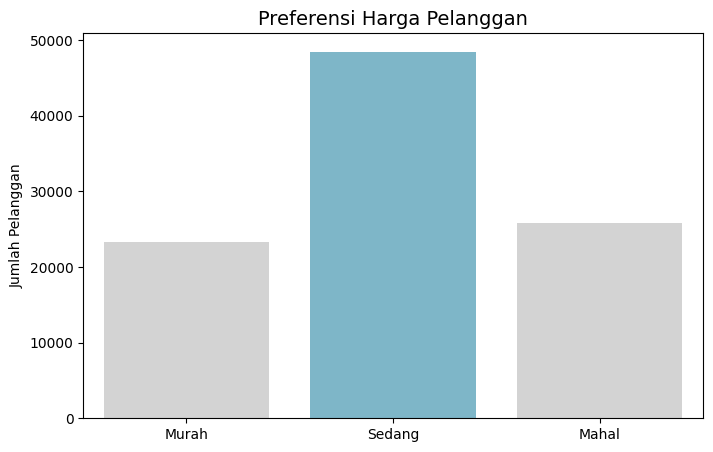

In [ ]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(8, 5))
sns.barplot(
    x="price_category", 
    y="customer_count", 
    hue="customer_count",
    data=price_preference,
    palette=colors, legend=False
)

plt.title("Preferensi Harga Pelanggan", fontsize=14)
plt.xlabel(None)
plt.ylabel("Jumlah Pelanggan", fontsize=10)
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi di atas, dapat ditentukan bahwa pelanggan lebih cenderung membeli produk dengan harga sedang daripada harga yang murah ataupun mahal.
- Visualisasi di atas menggunakan diagram batang dari library seaborn.

### Pertanyaan 3: Seberapa besar peluang bisnis di masing-masing daerah?

In [198]:
city_transactions = customer_orders_data["customer_city"].value_counts().reset_index()
city_transactions.columns = ["city", "transaction_count"]

In [199]:
Q1 = city_transactions["transaction_count"].quantile(0.25)
Q3 = city_transactions["transaction_count"].quantile(0.75)

bins = [0, Q1, Q3, city_transactions["transaction_count"].max()]
labels = ["Peluang Kecil", "Peluang Sedang", "Peluang Besar"]

city_transactions["business_opportunity"] = pd.cut(
    city_transactions["transaction_count"], bins=bins, labels=labels, include_lowest=True
)

city_transactions = city_transactions.sort_values(by="transaction_count", ascending=False)

city_transactions.head(10)

,city,transaction_count,business_opportunity
0,sao paulo,15540,Peluang Besar
1,rio de janeiro,6882,Peluang Besar
2,belo horizonte,2773,Peluang Besar
3,brasilia,2131,Peluang Besar
4,curitiba,1521,Peluang Besar
5,campinas,1444,Peluang Besar
6,porto alegre,1379,Peluang Besar
7,salvador,1245,Peluang Besar
8,guarulhos,1189,Peluang Besar
9,sao bernardo do campo,938,Peluang Besar


In [200]:
city_transactions = city_transactions.sort_values(by="transaction_count", ascending=True)
city_transactions.head(10)

,city,transaction_count,business_opportunity
4111,mutum parana,1,Peluang Kecil
4078,aurora do para,1,Peluang Kecil
4081,alto bela vista,1,Peluang Kecil
4071,novo planalto,1,Peluang Kecil
4072,santa rita de jacutinga,1,Peluang Kecil
4073,doutor camargo,1,Peluang Kecil
4090,apuarema,1,Peluang Kecil
4052,dom cavati,1,Peluang Kecil
4053,uirauna,1,Peluang Kecil
4054,crominia,1,Peluang Kecil


**Insight:**
- Program di atas adalah proses untuk mengelompokkan data ke dalam beberapa label dengan menggunakan metode manual clustering dengan binning. Pada program di atas, data akan dibagi ke dalam 3 kategori yaitu peluang kecil, peluang sedang, dan peluang besar berdasarkan dari banyaknya jumlah transaksi yang dilakukan oleh setiap customer di daerah tertentu.
- Dari proses di atas dapat ditemukan bahwa Sao Paulo adalah kota dengan tingkat peluang bisnis yang tinggi dikarenakan daya konsumsi customer yang berasal dari kota tersebut sangat banyak, yaitu sebanyak 15540 transaksi. Dan kota dengan tingkat peluang bisnis yang paling kecil dan berada di index terakhir adalah Mutum Parana dengan total transaksi hanya 1 kali saja.

In [201]:
state_transactions = customer_orders_data["customer_state"].value_counts().reset_index()
state_transactions.columns = ["state", "transaction_count"]

In [202]:
Q1 = state_transactions["transaction_count"].quantile(0.25)
Q3 = state_transactions["transaction_count"].quantile(0.75)

bins = [0, Q1, Q3, state_transactions["transaction_count"].max()]
labels = ["Peluang Kecil", "Peluang Sedang", "Peluang Besar"]

state_transactions["business_opportunity"] = pd.cut(
    state_transactions["transaction_count"], bins=bins, labels=labels, include_lowest=True
)

state_transactions = state_transactions.sort_values(by="transaction_count", ascending=False)
state_transactions.head(10)

,state,transaction_count,business_opportunity
0,SP,41746,Peluang Besar
1,RJ,12852,Peluang Besar
2,MG,11635,Peluang Besar
3,RS,5466,Peluang Besar
4,PR,5045,Peluang Besar
5,SC,3637,Peluang Besar
6,BA,3380,Peluang Besar
7,DF,2140,Peluang Sedang
8,ES,2033,Peluang Sedang
9,GO,2020,Peluang Sedang


In [203]:
state_transactions = state_transactions.sort_values(by="transaction_count", ascending=True)
state_transactions.head(10)

,state,transaction_count,business_opportunity
26,RR,46,Peluang Kecil
25,AP,68,Peluang Kecil
24,AC,81,Peluang Kecil
23,AM,148,Peluang Kecil
22,RO,253,Peluang Kecil
21,TO,280,Peluang Kecil
20,SE,350,Peluang Kecil
19,AL,413,Peluang Sedang
18,RN,485,Peluang Sedang
17,PI,495,Peluang Sedang


**Insight:**
- Program di atas adalah proses untuk mengelompokkan data ke dalam beberapa label dengan menggunakan metode manual clustering dengan binning. Pada program di atas, data akan dibagi ke dalam 3 kategori yaitu peluang kecil, peluang sedang, dan peluang besar berdasarkan dari banyaknya jumlah transaksi yang dilakukan oleh setiap customer di daerah tertentu.
- Dari proses di atas dapat ditemukan bahwa SP atau Sao Paulo adalah kota dengan tingkat peluang bisnis yang tinggi dikarenakan daya konsumsi customer yang berasal dari negara tersebut sangat banyak, yaitu sebanyak 41746 transaksi. Dan negara dengan peluang bisnisnya kecil adalah RR dengan total transaksi hanya terjadi sebanyak 46 kali.

In [204]:
category_opportunity_city = city_transactions["business_opportunity"].value_counts().reset_index()
category_opportunity_city.columns = ["business_opportunity", "count"]

print(category_opportunity_city)

  business_opportunity  count
0       Peluang Sedang   2011
1        Peluang Kecil   1144
2        Peluang Besar    964


In [205]:
category_opportunity_state = state_transactions["business_opportunity"].value_counts().reset_index()
category_opportunity_state.columns = ["business_opportunity", "count"]

print(category_opportunity_state)

  business_opportunity  count
0       Peluang Sedang     13
1        Peluang Kecil      7
2        Peluang Besar      7


**Insight:**
- Program di atas digunakan untuk mentotal banyaknya data di dalam masing-masing kategori, dan dapat dilihat bahwa sebanyak 2011 kota memiliki peluang bisnis sedang, transaksi yang telah dilakukan di kota tersebut tidak terlalu sedikit dan juga tidak terlalu banyak.
- Kemudian program setelahnya juga digunakan untuk mentotal banyaknya data di dalam masing-masing kategori, dan sebanyak 13 negara memiliki peluang bisnis sedang, 7 negara berpeluang besar, dan 7 negara lagi berpeluang kecil.

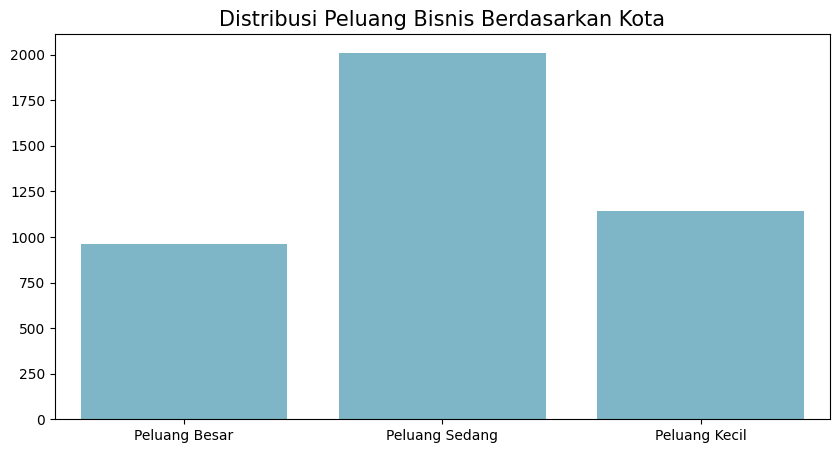

In [206]:
category_opportunity_city = pd.DataFrame({
    "business_opportunity": ["Peluang Sedang", "Peluang Kecil", "Peluang Besar"],
    "count": [2011, 1144, 964]
})

colors = ["#72BCD4", "#72BCD4", "#72BCD4"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="business_opportunity",
    y="count",
    hue="count",
    data=category_opportunity_city,
    order=["Peluang Besar", "Peluang Sedang", "Peluang Kecil"], 
    palette=colors, legend=False
)

plt.title("Distribusi Peluang Bisnis Berdasarkan Kota", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=0)
plt.show()

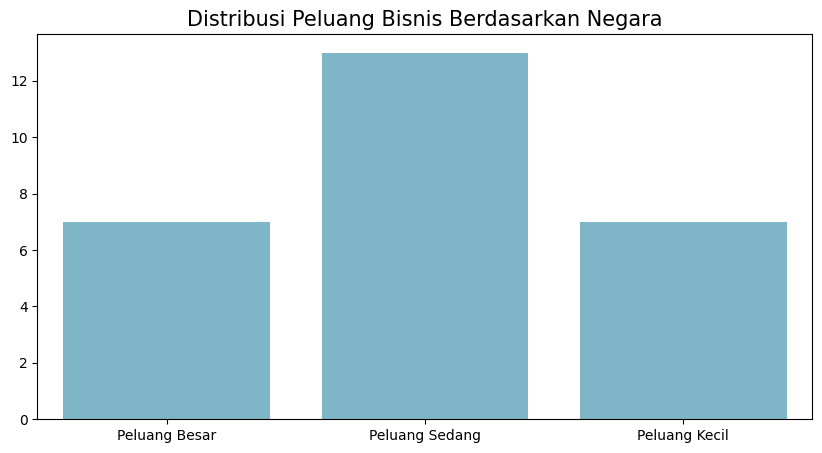

In [207]:
category_opportunity_state = pd.DataFrame({
    "business_opportunity": ["Peluang Sedang", "Peluang Kecil", "Peluang Besar"],
    "count": [13, 7, 7]
})

colors = ["#72BCD4", "#72BCD4"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="business_opportunity",
    y="count",
    hue="count",
    data=category_opportunity_state,
    order=["Peluang Besar", "Peluang Sedang", "Peluang Kecil"], 
    palette=colors, legend=False
)

plt.title("Distribusi Peluang Bisnis Berdasarkan Negara", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Dari hasil visualisasi di atas dapat ditemukan bahwa peluang bisnis dengan kategori sedang sangatlah banyak baik berdasarkan kota maupun negara. Sehingga diharapkan dengan data yang sudah ditemukan nilainya dapat membantu mengarahkan layanan e-commerce untuk menentukan sasaran yang tepat demi kemajuan penjualan dengan memperhatikan daya beli pelanggan dimasing-masing kota dan negara.

## Conclusion

- Conclution pertanyaan 1:
  Berdasarkan dengan data-data yang telah diolah dan diproses untuk menjawab pertanyaan bisnis yang telah dibuat, "credit_card" adalah metode pembayaran yang paling digemari berdasarkan dari tingkat penggunaannya yang tinggi. Sehingga dari data ini, perusahaan dapat meningkatkan layanan pembayaran yang memiliki tingkat penggunaan yang kecil ataupun dapat memaksimalkan metode pembayaran dengan menggunakan credit_card.
- Conclution pertanyaan 2:
  Berdasarkan dengan data-data yang telah diolah dan diproses untuk menjawab pertanyaan bisnis yang telah dibuat, cama_mesa_banho adalah jenis produk yang paling banyak dibeli oleh pelanggan. Dan berdasarkan perhitungan tentang prefrensi pelanggan dapat disimpulkan bahwa sebagian besar pelanggan sangat suka belanja produk-produk yang memiliki harga sedang, tidak terlalu murah dan juga tidak mahal.
- Conclution pertanyaan 3:
  Berdasarkan dengan data-data yang telah diolah dan diproses untuk menjawab pertanyaan bisnis yang telah dibuat, kota Sao Paulo dan negara Sao Paulo adalah daerah dengan tingkat transaksi terbanyak dan menjadi daerah dengan peluang bisnis terbesar dengan jumlah transaksi 15540. Sehingga dengan data yang telah didapat ini, perusahaan dapat memaksimalkan bisnis di daerah tersebut dan beberapa daerah yang memiliki peluang bisnis besar lainnya.

In [216]:
all_df = pd.merge(items_df, orders_df, on="order_id", how="left")
all_df = pd.merge(all_df, customers_df, on="customer_id", how="left")
all_df = pd.merge(all_df, payments_df, on="order_id", how="left")
all_df = pd.merge(all_df, products_df, on="product_id", how="left")
all_df.to_csv("all_data.csv", index=False)